In [1]:
import os
import numpy as np
import scipy.io as scio
import tensorflow as tf
class SVHN():
    def __init__(self, directory = "./"):
        self._directory = directory
        
        self._training_data = np.array([])
        self._training_labels = np.array([])
        self._test_data = np.array([])
        self._test_labels = np.array([])
        
        self._load_traing_data()
        #self._load_test_data()
        
        np.random.seed(0)
        samples_n = self._training_labels.shape[0]
        random_indices = np.random.choice(samples_n, samples_n // 10, replace = False)
        np.random.seed()
        
        self._validation_data = self._training_data[random_indices]
        self._validation_labels = self._training_labels[random_indices]
        self._training_data = np.delete(self._training_data, random_indices, axis = 0)
        self._training_labels = np.delete(self._training_labels, random_indices)
    
    
    def _load_traing_data(self):
        self._training_data, self._training_labels = self._load_data("train_32x32.mat")        
    
    def _load_test_data(self):
        self._test_data, self._test_labels = self._load_data("test_32x32.mat")
    
    def _rgb2gray(self, rgb):
        return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
    
    def _load_data(self, file):
        path = os.path.join(self._directory, file)
        
        mat = scio.loadmat(path)
        data = np.moveaxis(mat["X"], 3, 0)
        data = self._rgb2gray(data)
        data = data.reshape(data.shape + (1,))
        
        labels = mat["y"].reshape(mat["y"].shape[0])
        labels[labels == 10] = 0
        
        return data, labels
    
    def get_training_batch(self, batch_size):
        return self._get_batch(self._training_data, self._training_labels, batch_size)
    
    def get_validation_batch(self, batch_size):
        return self._get_batch(self._validation_data, self._validation_labels, batch_size)
    
    #def get_test_batch(self, batch_size):
    #    return self._get_batch(self._test_data, self._test_labels, batch_size)
    
    def _get_batch(self, data, labels, batch_size):
        samples_n = labels.shape[0]
        
        if batch_size <= 0:
            batch_size = samples_n
        
        random_indices = np.random.choice(samples_n, samples_n, replace = False)
        data = data[random_indices]
        labels = labels[random_indices]
        for i in range(samples_n // batch_size):
            on = i * batch_size
            off = on + batch_size
            yield data[on:off], labels[on:off]
    
    
    def get_sizes(self):
        training_samples_n = self._training_labels.shape[0]
        validation_samples_n = self._validation_labels.shape[0]
        test_samples_n = self._test_labels.shape[0]
        return training_samples_n, validation_samples_n, test_samples_n
    
    


# Getting the data

In [2]:

svhn = SVHN('C:\\Users\\Simeon\\Google Drive\\CogSci\\WS 17-18\\ANNs with TensorFlow\\HomeWork Tasks\\4')
svhn._load_traing_data()



    

# Checking the data

<IPython.core.display.Javascript object>


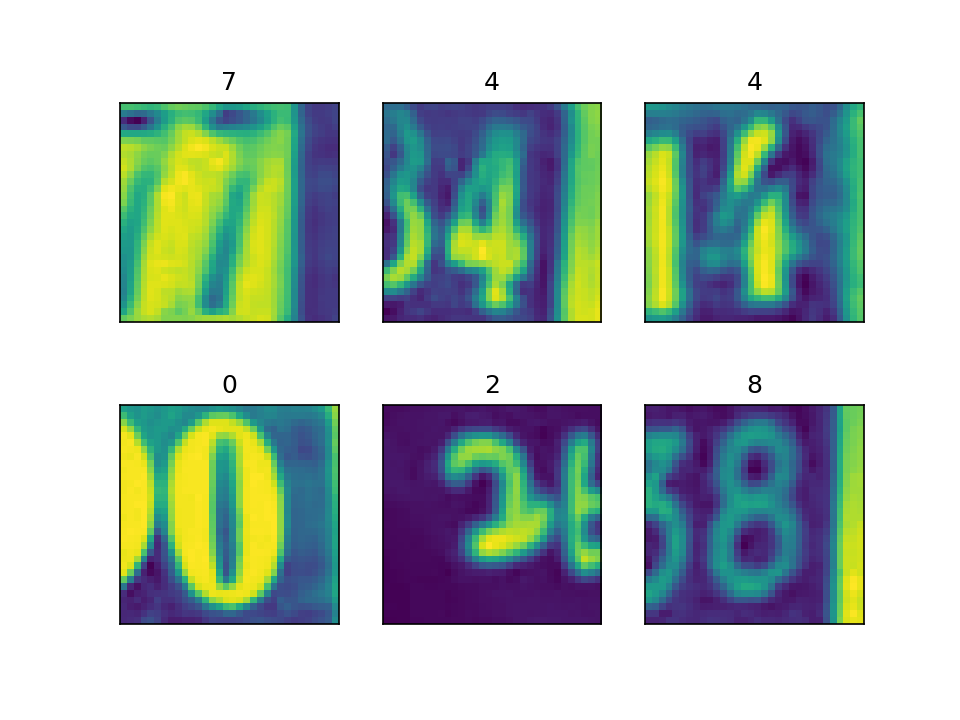

In [3]:

import matplotlib.pyplot as plt

import matplotlib.image as mpimg

%matplotlib notebook

#The labels match the training data
fig, axs = plt.subplots(2, 3)
images, labels = next(svhn.get_training_batch(6))


for i, ax in enumerate(np.reshape(axs, [-1])):
    ax.cla()
    ax.imshow(images[i].squeeze())
    ax.set_title(labels[i])
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)


# Construction Phase

In [5]:
#Variable initialization functions
def weight_variable(shape, std=0.1):
    initial = tf.truncated_normal(shape, stddev=std)
    return tf.Variable(initial)
def bias_variable(s):
    initial = tf.constant(0.1, shape=s)
    return tf.Variable(initial)

In [10]:
#Convolution-related functions
def conv(inp, weight):
    return tf.nn.conv2d(inp, weight, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(out):
    return tf.nn.max_pool(out, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [29]:



#Placeholders

x = tf.placeholder(tf.float32, shape=[None, 32, 32, 1])
desired = tf.placeholder(tf.int64, shape=[None])

#Variable initialization functions
x_norm = tf.map_fn(lambda img : tf.image.per_image_standardization(img), x)



#First huge conv
w_start = weight_variable([5,5,1,16])
conv_start = conv(x_norm, w_start)
bias_start = bias_variable([16])

act_start = tf.nn.relu(conv_start + bias_start)
pool_start = max_pool_2x2(act_start)


#Dense block 1


#first layer

w_conv1_block1 = weight_variable([3,3,16,8])
conv1_block1 = conv(pool_start, w_conv1_block1)
bias_conv1_block1 = bias_variable([8])

activation1_block1 = tf.nn.elu(conv1_block1 + bias_conv1_block1)

#Concatenate the new output
concatenated11 = tf.concat([activation1_block1, pool_start], 3)

#second layer
w_conv2_block1 = weight_variable([3,3,24,8])
conv2_block1 = conv(concatenated11, w_conv2_block1)
bias_conv2_block1 = bias_variable([8])

activation2_block1 = tf.nn.elu(conv1_block1 + bias_conv2_block1)

#Concatenate the new output
concatenated12 = tf.concat([activation2_block1, concatenated11], 3)

#Third layer
w_conv3_block1 = weight_variable([3,3,32,8])
conv3_block1 = conv(concatenated12, w_conv3_block1)
bias_conv3_block1 = bias_variable([8])

activation3_block1 = tf.nn.elu(conv3_block1 + bias_conv3_block1)


#first transitional layer


#Max pooling
pool1 = max_pool_2x2(activation3_block1)





#Dense block 2


#first layer

w_conv1_block2 = weight_variable([3,3,8,16])
conv1_block2 = conv(pool1, w_conv1_block2)
bias_conv1_block2 = bias_variable([16])

activation1_block2 = tf.nn.elu(conv1_block2 + bias_conv1_block2)

#Concatenate the new output
concatenated21 = tf.concat([activation1_block2, pool1], 3)

#second layer
w_conv2_block2 = weight_variable([3,3,24,16])
conv2_block2 = conv(concatenated21, w_conv2_block2)
bias_conv2_block2 = bias_variable([16])

activation2_block2 = tf.nn.elu(conv2_block2 + bias_conv2_block2)

#Concatenate the new output
concatenated22 = tf.concat([activation2_block2, concatenated21], 3)


#Third layer
w_conv3_block2 = weight_variable([3,3,40,16])
conv3_block2 = conv(concatenated22, w_conv3_block2)
bias_conv3_block2 = bias_variable([16])

activation3_block2 = tf.nn.elu(conv3_block2 + bias_conv3_block2)


#second transitional layer

#Final Average pooling
pool2 = tf.nn.avg_pool(activation3_block2, ksize=[1, 5, 5, 1], strides=[1, 1, 1, 1], padding='SAME')


pool2_flat = tf.reshape(pool2, [-1, 8*8*16])
#activation1 = tf.nn.elu(tf.matmul(pool2_flat, w_ffnn1) + b_ffnn1)




#FFNN1
w_ffnn1 = weight_variable([8 * 8 * 16, 1024], std=2/(8**3))
b_ffnn1 = bias_variable([1024])
activation1 = tf.nn.elu(tf.matmul(pool2_flat, w_ffnn1) + b_ffnn1)

dropout = tf.layers.dropout(inputs=activation1, rate=0.4)  #Layer 10 Dropout

w_ffnn9 = weight_variable([1024,512], std=2/(1024))
b_ffnn9 = bias_variable([512])
activation9 = tf.nn.elu(tf.matmul(dropout,w_ffnn9)+b_ffnn9)  # Layer 11 FF



#FFNN2
w_ffnn2 = weight_variable([512, 10], std=2/(512))
b_ffnn2 = bias_variable([10])

logits = tf.matmul(activation9, w_ffnn2) + b_ffnn2


cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = desired, logits = logits)
cross_entropy = tf.reduce_mean(cross_entropy)

learning_rate = 0.001
optimizer = tf.train.RMSPropOptimizer(learning_rate,decay = 0.9,epsilon=1e-10,centered=True)
#optimizer = tf.train.GradientDescentOptimizer(learning_rate)
#optimizer = tf.train.AdamOptimizer(learning_rate)
training_step = optimizer.minimize(cross_entropy)

accuracy = tf.equal(tf.argmax(tf.nn.softmax(logits), 1), desired)
accuracy = tf.reduce_mean(tf.cast(accuracy, tf.float32))






# Exectution Phase

In [30]:
mini_batch_size = 50
epochs = 3
training_steps = svhn.get_sizes()[0] // mini_batch_size
plot_step_size = 50  

<IPython.core.display.Javascript object>


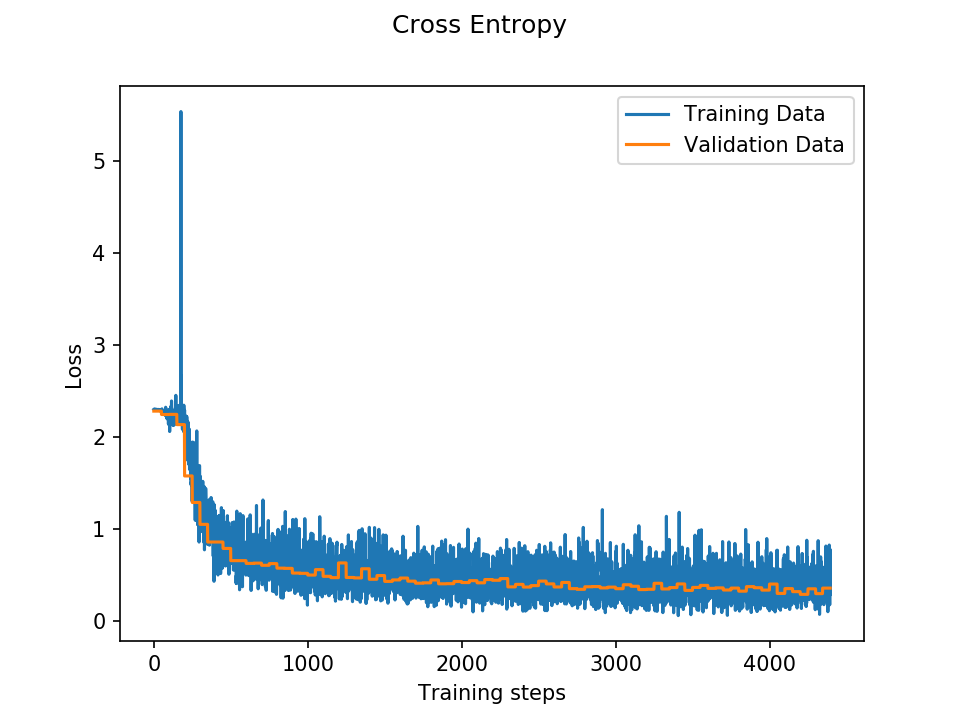

<IPython.core.display.Javascript object>


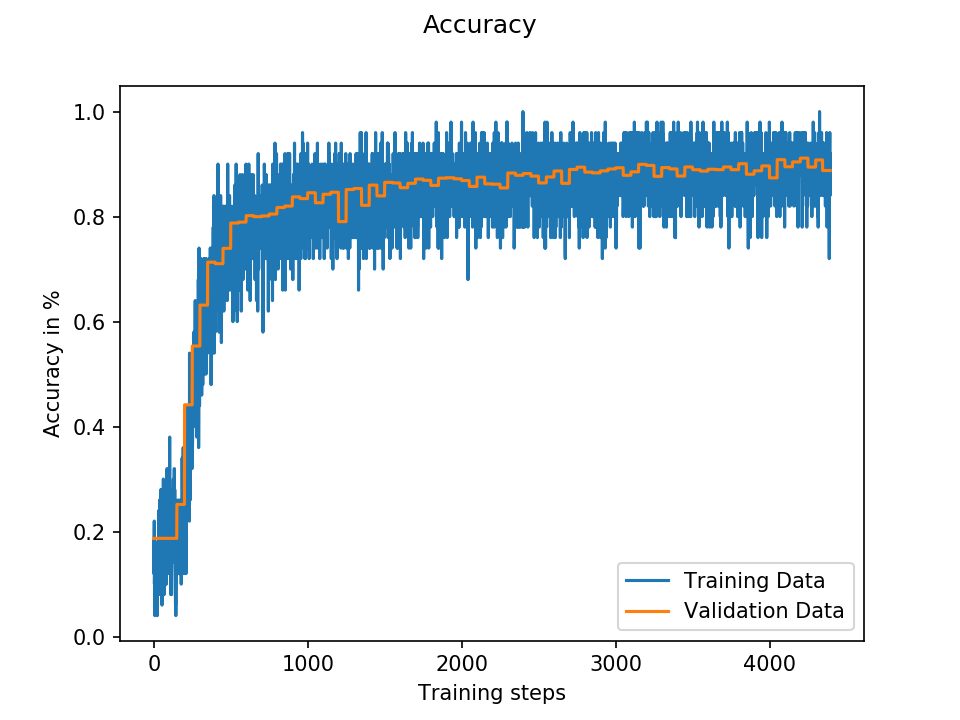

In [31]:
#Variables and figures for plotting

_accuracy_train = np.ones(training_steps*epochs)
_loss_train = np.zeros(training_steps*epochs)
_accuracy_valid = np.ones(training_steps*epochs)
_loss_valid = np.zeros(training_steps*epochs)

fig_cross_entropy, ax_cross_entropy = plt.subplots()
fig_cross_entropy.suptitle("Cross Entropy")

fig_accuracy, ax_accuracy = plt.subplots()
fig_accuracy.suptitle("Accuracy")



In [32]:
#Training the network

with tf.Session() as session: 
    session.run(tf.global_variables_initializer()) 
    step = 0
    last_step = False
    for epoch in range(epochs):
        
        for images, labels in svhn.get_training_batch(mini_batch_size):
            _loss_train[step], _accuracy_train[step], _ = session.run( [cross_entropy, accuracy, training_step], feed_dict = {x: images, desired: labels} ) 
            
            if step == (training_steps * epochs)-1:
                last_step = True
                
            if step%plot_step_size==0 or last_step==True:
                
                images, labels = next(svhn.get_validation_batch(0))
                
                loss_validation, accuracy_validation = session.run([cross_entropy, accuracy] , feed_dict={x: images, desired: labels})
                
                if step != 0:
                    on = step - plot_step_size if not last_step else step - plot_step_size + 1
                    off = on + plot_step_size
                    _loss_valid[on:off] = [loss_validation] * plot_step_size
                    _accuracy_valid[on:off] = [accuracy_validation] * plot_step_size
                    

                ax_cross_entropy.cla()
                ax_cross_entropy.plot(_loss_train, label="Training Data")
                ax_cross_entropy.plot(_loss_valid, label="Validation Data")
                ax_cross_entropy.set_xlabel("Training steps")
                ax_cross_entropy.set_ylabel("Loss")
                #ax_cross_entropy.set_ylim([0, 2.5])
                ax_cross_entropy.legend()
                fig_cross_entropy.canvas.draw()

                ax_accuracy.cla()
                ax_accuracy.plot(_accuracy_train, label="Training Data")
                ax_accuracy.plot(_accuracy_valid, label="Validation Data")
                ax_accuracy.set_xlabel("Training steps")
                ax_accuracy.set_ylabel("Accuracy in %")
                #ax_cross_entropy.set_ylim([0, 1])
                ax_accuracy.legend()
                fig_accuracy.canvas.draw()

            
            step += 1

